### Table of Content

[1. Linear Regression with L2 Regularization Codes](#lr1_L2) <br>

[2. Comparison with Scikit-Learn](#lr2_L2) <br>


## <a id='lr1_L2'></a> 1. Linear Regression with L2 Regularization Codes

In [1]:
import pandas as pd
import numpy as np

In [2]:
def loss_MSE(X, Y, b, W1, W2): # Mean Squared Error
    """
    Find the Mean Squared Error between true outputs and predicted outputs
    Inputs: X - list, the input feature values
            Y - list, the true output values
            b - float/int, bias
            W1 - float/int, weight for the 1st feature (i.e., size_sqft)
            W2 - float/int, weight for the 2nd feature (i.e., num_bedrooms)
    Outputs: MSE - float
    """
    X1 = [val[0] for val in X]
    X2 = [val[1] for val in X]
    m = len(X)
    total_loss = 0
    for i in range(m):
        total_loss = total_loss + (Y[i] - (b + X1[i]*W1 + X2[i]*W2))**2
    MSE = total_loss / m
    return MSE

In [3]:
def update_bias_weights(X, Y, b, W1, W2, learning_rate, penalty_coef):
    """
    Update the bias and weights based on Gradient Descent 
    Inputs: X - list, the input feature values
            Y - list, the true output values
            b - float/int, bias
            W1 - float/int, weight for the 1st feature (i.e., size_sqft)
            W2 - float/int, weight for the 2nd feature (i.e., num_bedrooms)
            learning_rate - float, the learning rate used in Gradient Descent
            penalty_coef - float, the penalty coefficient that multiplies the L2 term
    Outputs: (b, W1, W2) - tuple, the updated bias and weights
    """
    X1 = [val[0] for val in X]
    X2 = [val[1] for val in X]
    m = len(X)
    dL_dW1 = 0
    dL_dW2 = 0
    dL_db  = 0
    
    for i in range(m):     
        dL_db  = dL_db  + 2 * (Y[i] - (b + X1[i]*W1 + X2[i]*W2)) * (-1)
        dL_dW1 = dL_dW1 + 2 * (Y[i] - (b + X1[i]*W1 + X2[i]*W2)) * (-X1[i])
        dL_dW2 = dL_dW2 + 2 * (Y[i] - (b + X1[i]*W1 + X2[i]*W2)) * (-X2[i])
            
    dL_db  = dL_db
    dL_dW1 = dL_dW1 + (2 * penalty_coef * W1)
    dL_dW2 = dL_dW2 + (2 * penalty_coef * W2)

    # We subtract because the derivatives point in direction of steepest ascent
    b  = b  - dL_db  * learning_rate
    W1 = W1 - dL_dW1 * learning_rate 
    W2 = W2 - dL_dW2 * learning_rate

    return (b, W1, W2)

In [4]:
def train(X, Y, b, W1, W2, learning_rate, learning_iterations, penalty_coef):
    """
    Train linear regression model for the specified iterations
    Inputs: X - list, the input feature values
            Y - list, the true output values
            b - float/int, bias
            W1 - float/int, weight for the 1st feature (i.e., size_sqft)
            W2 - float/int, weight for the 2nd feature (i.e., num_bedrooms)
            learning_rate - float, the learning rate used in Gradient Descent
            learning_iterations - int, the number of times of training
    Outputs: (loss_history, b, W1, W2) - tuple, return the loss_history, and 
                                                the final bias and weights
    """
    loss_history = []

    for i in range(learning_iterations):
        b, W1, W2 = update_bias_weights(X, Y, b, W1, W2, learning_rate, penalty_coef)
        
        # find MSE after the ith iteration of updating bias and weights
        loss = loss_MSE(X, Y, b, W1, W2)
        loss_history.append(loss)
        
        if i < 5 or i >= learning_iterations-5:
            print ("iter={:d} \t b={:.5f} \t W1={:.5f} \t W2={:.5f} \t MSE={}".format(i+1, b, W1, W2, loss))
    return (loss_history, b, W1, W2)

In [5]:
def max_min_norm(X):
    """
    Normalize dataset by using the Max-min normalization technique
    Inputs: X - numpy.ndarray, the dataset for normalization
    Outputs: (X_norm, np.array(max_min_vals)) - tuple, return the normalized dataset, 
                                            and the max and min values of each feature
    """
    X_norm = X.copy().astype(float)
    max_min_vals = []
    for col in range(0, X_norm.shape[1]):
        X_max = X_norm[:, col].max()
        X_min = X_norm[:, col].min()
        X_range = X_max - X_min
        X_norm[:, col] = (X_norm[:, col] - X_min) / X_range
        max_min_vals.append({"X_max":X_max, "X_min":X_min, "X_range":X_range})
    return (X_norm, np.array(max_min_vals))

In [6]:
# The small dataset
data = np.array([[1600,5,2.28],
                 [1200,4,1.5],
                 [740,2,0.88]])
col_names = ['size_sqft', 'num_bedrooms', 'sale_price_million']
print(pd.DataFrame(data, columns=col_names), "\n")

X = data[:, :-1] # all rows, all columns except the last column
Y = data[:, -1]  # all rows, last column only

X, max_min_vals = max_min_norm(X) # normalize the input features
X = X.tolist()
Y = Y.tolist()

# Initialize bias and weights
initial_b  = 0
initial_W1 = 0
initial_W2 = 0

# Set learing rate and iterations
learning_rate = 0.001
learning_iterations = 500000

# Set penalty coefficient
penalty_coef = 0.1

# Start the training of linear regression model
loss_history, b, W1, W2 = train(X, Y, initial_b, initial_W1, initial_W2, learning_rate, learning_iterations, penalty_coef)

   size_sqft  num_bedrooms  sale_price_million
0     1600.0           5.0                2.28
1     1200.0           4.0                1.50
2      740.0           2.0                0.88 

iter=1 	 b=0.00932 	 W1=0.00616 	 W2=0.00656 	 MSE=2.6852541963795
iter=2 	 b=0.01854 	 W1=0.01227 	 W2=0.01305 	 MSE=2.630717277484433
iter=3 	 b=0.02767 	 W1=0.01830 	 W2=0.01948 	 MSE=2.577299090027449
iter=4 	 b=0.03670 	 W1=0.02428 	 W2=0.02583 	 MSE=2.5249766308904253
iter=5 	 b=0.04564 	 W1=0.03019 	 W2=0.03213 	 MSE=2.473727370498438
iter=499996 	 b=0.89066 	 W1=0.70996 	 W2=0.53900 	 MSE=0.0122176028514185
iter=499997 	 b=0.89066 	 W1=0.70996 	 W2=0.53900 	 MSE=0.0122176028514185
iter=499998 	 b=0.89066 	 W1=0.70996 	 W2=0.53900 	 MSE=0.0122176028514185
iter=499999 	 b=0.89066 	 W1=0.70996 	 W2=0.53900 	 MSE=0.0122176028514185
iter=500000 	 b=0.89066 	 W1=0.70996 	 W2=0.53900 	 MSE=0.0122176028514185


In [7]:
new_data = np.array([[1200,3]], dtype = float)

# Max-min normalization
for col in range(0, new_data.shape[1]):
    new_data[:, col] = ((new_data[:, col] 
                        - max_min_vals[col]['X_min']) 
                        / max_min_vals[col]['X_range'])
    
# Use the final bias and weights values
predicted_price = b + W1*new_data[0][0] + W2*new_data[0][1]

print(f'''For the house with 1200 sqft and 3 bedrooms, 
the sale price is predicted to be {np.round(predicted_price,3)} million.''')

For the house with 1200 sqft and 3 bedrooms, 
the sale price is predicted to be 1.45 million.


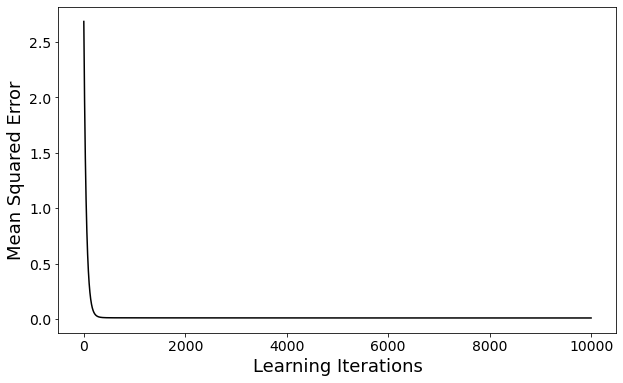

In [8]:
import matplotlib.pyplot as plt

itr = list(range(0, learning_iterations))
fig = plt.figure(figsize = (10, 6))
plt.xlabel('Learning Iterations', fontsize=18)
plt.ylabel('Mean Squared Error', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
# plt.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False)
# plt.scatter(itr[0:100], cost_history[0:100], s=20)
plt.plot(itr[:10000], loss_history[:10000], color='black')
# plt.savefig('MSE_LREG_L2_10000.jpg', dpi=600)
plt.show()

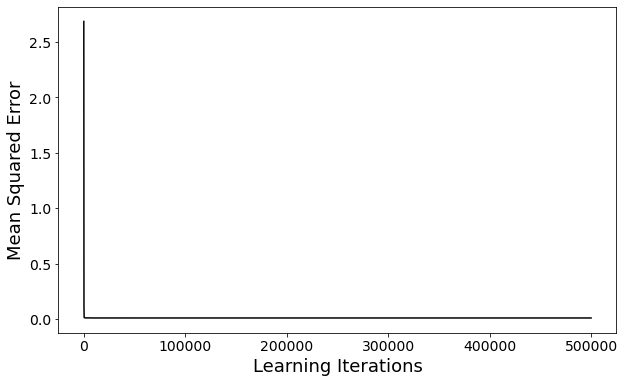

In [9]:
itr = list(range(0, learning_iterations))
fig = plt.figure(figsize = (10, 6))
plt.xlabel('Learning Iterations', fontsize=18)
plt.ylabel('Mean Squared Error', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
# plt.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False)
plt.plot(itr[:], loss_history[:], color='black')
# plt.savefig('MSE_LREG_L2_all.jpg', dpi=600)
plt.show()

## <a id='lr2_L2'></a> 2. Comparison with Scikit-Learn

In [10]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge

# The small dataset
data = np.array([[1600,5,2.28],
                 [1200,4,1.5],
                 [740,2,0.88]])
X = data[:, :-1] # all rows, all columns except the last column
Y = data[:, -1]  # all rows, last column only

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X) # update to Normalized X

l2_reg = Ridge(alpha=0.1) # alpha is the penalty coefficient
l2_reg.fit(X, Y)

print(f"The optimal bias found by sklearn: {np.round(l2_reg.intercept_,4)}")
print(f"The optimal weights found by sklearn: {np.round(l2_reg.coef_,4)}")

from sklearn.metrics import mean_squared_error 
print("\nMSE found by sklearn:", np.round(mean_squared_error(Y, l2_reg.predict(X)),5))

The optimal bias found by sklearn: 0.8907
The optimal weights found by sklearn: [0.71  0.539]

MSE found by sklearn: 0.01222


In [11]:
new_data = np.array([[1200,3]], dtype = float)
new_data = scaler.transform(new_data)

print(f'''For the house with 1200 sqft and 3 bedrooms, 
the sale price is predicted to be {np.round(l2_reg.predict(new_data),3)} million.''')

For the house with 1200 sqft and 3 bedrooms, 
the sale price is predicted to be [1.45] million.
